In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
train_dir = 'traindata'
img_width, img_height = 299, 299  # Xception requires a minimum input size of 71x71
batch_size = 32

# Data Augmentation and Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Using 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification (Men/Women)
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 1986 images belonging to 2 classes.
Found 495 images belonging to 2 classes.


In [ ]:
pip install --upgrade tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load the Xception model pre-trained on ImageNet, excluding the top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Check the input and output shapes
print("Base model input shape:", base_model.input_shape)
print("Base model output shape:", base_model.output_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Base model input shape: (None, 299, 299, 3)
Base model output shape: (None, 10, 10, 2048)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 21,123,881 (80.58 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
epochs = 15

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/15


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7834 - loss: 0.4311 - val_accuracy: 0.9208 - val_loss: 0.2373
Epoch 2/15
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1:47 2s/step - accuracy: 0.8438 - loss: 0.2578

2024-08-17 09:06:20.728026: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8438 - loss: 0.2578 - val_accuracy: 0.9333 - val_loss: 0.2440
Epoch 3/15


2024-08-17 09:06:21.573478: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


62/62 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8909 - loss: 0.2442 - val_accuracy: 0.8917 - val_loss: 0.2926
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9062 - loss: 0.2226 - val_accuracy: 0.8000 - val_loss: 0.2873
Epoch 5/15


2024-08-17 09:08:52.984938: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


62/62 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9082 - loss: 0.2260 - val_accuracy: 0.9250 - val_loss: 0.1971
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8438 - loss: 0.2934 - val_accuracy: 1.0000 - val_loss: 0.0864
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.9200 - loss: 0.1919 - val_accuracy: 0.9208 - val_loss: 0.1996
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9688 - loss: 0.2274 - val_accuracy: 0.9333 - val_loss: 0.4116
Epoch 9/15


2024-08-17 09:15:01.713218: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


62/62 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9271 - loss: 0.1968 - val_accuracy: 0.9167 - val_loss: 0.2092
Epoch 10/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9375 - loss: 0.2657 - val_accuracy: 0.8667 - val_loss: 0.3292
Epoch 11/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9369 - loss: 0.1656 - val_accuracy: 0.9271 - val_loss: 0.1989
Epoch 12/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9375 - loss: 0.1259 - val_accuracy: 0.8000 - val_loss: 0.5320
Epoch 13/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.9379 - loss: 0.1625 - val_accuracy: 0.9167 - val_loss: 0.2286
Epoch 14/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 1.0000 - loss: 0.1058 - val_accuracy: 1.0000 - val_loss: 0.0519
Epoch 15/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.9335 - loss: 0.1677 - val_accuracy: 0.9250 - val_loss: 0.2169


In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)

# Predict classes for validation data
validation_generator.reset()
y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# True labels
y_true = validation_generator.classes[:len(y_pred)]


15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step


In [ ]:
# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['MEN', 'WOMEN']))

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

         MEN       0.40      0.34      0.36       196
       WOMEN       0.58      0.64      0.61       284

    accuracy                           0.52       480
   macro avg       0.49      0.49      0.49       480
weighted avg       0.51      0.52      0.51       480

Validation Accuracy: 92.53%


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def classify_image(image_path):
    try:
        # Load and preprocess the image
        img = load_img(image_path, target_size=(img_width, img_height))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Rescale the image

        # Make prediction
        prediction = model.predict(img_array)
        confidence = prediction[0][0]
        if confidence > 0.5:
            label = "WOMEN"
            confidence = confidence * 100
        else:
            label = "MEN"
            confidence = (1 - confidence) * 100

        # Display the image with the prediction
        plt.imshow(img)
        plt.title(f"Predicted: {label} ({confidence:.2f}% confidence)")
        plt.axis('off')  # Hide axis
        plt.show()

        return label, confidence
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None, None

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


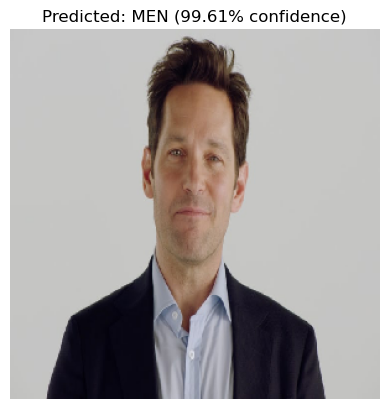

In [ ]:
image_path = '/Users/arunaa/SIH/traindata/MEN/00001027.jpg'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


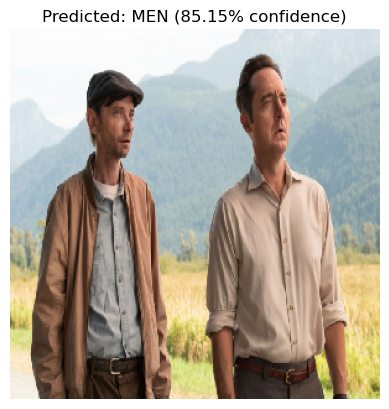

In [ ]:
image_path = '/Users/arunaa/SIH/traindata/MEN/00001075.jpg'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


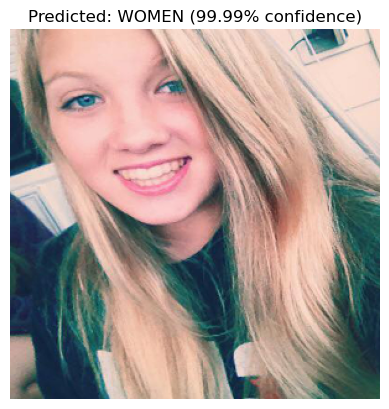

In [ ]:
image_path = '/Users/arunaa/SIH/traindata/WOMEN/00001644.jpg'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


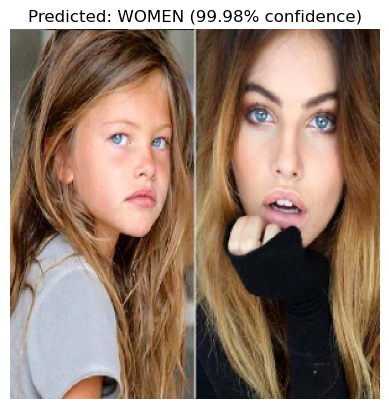

In [ ]:
image_path = '/Users/arunaa/SIH/traindata/WOMEN/00001695.jpg'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


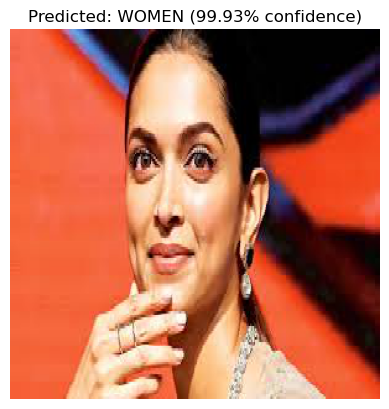

In [ ]:
image_path = '/Users/arunaa/SIH/i1.jpeg'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


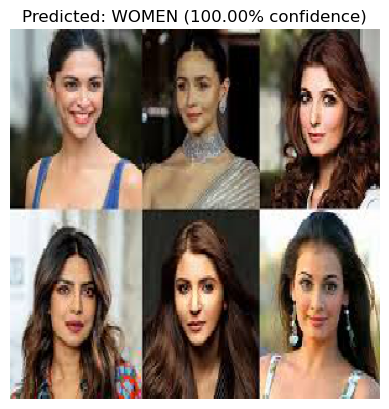

In [ ]:
image_path = '/Users/arunaa/SIH/i2.jpeg'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


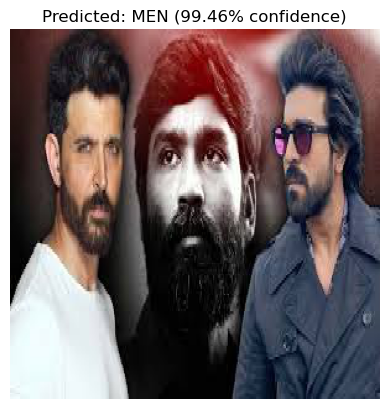

In [ ]:
image_path = '/Users/arunaa/SIH/i3.jpeg'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


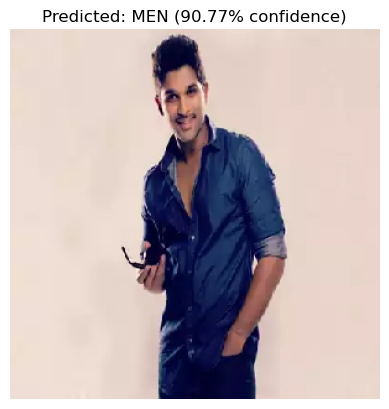

In [ ]:
image_path = '/Users/arunaa/SIH/i4.webp'
label, confidence = classify_image(image_path)

In [ ]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


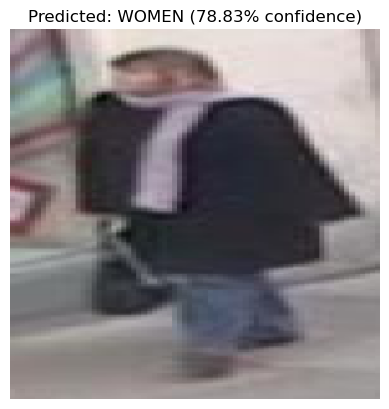

In [ ]:
image_path = '/Users/arunaa/SIH/CCTV_Gender/FEMALE/31_643.jpg'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


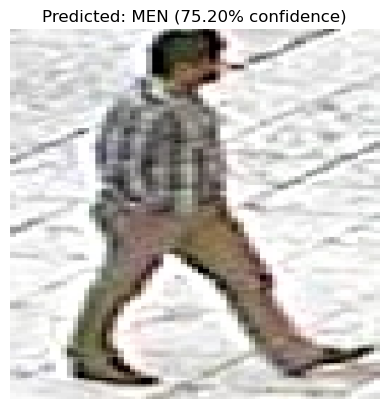

In [ ]:
image_path = '/Users/arunaa/SIH/CCTV_Gender/MALE/8_834_FRAME_18_RGB.bmp'
label, confidence = classify_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


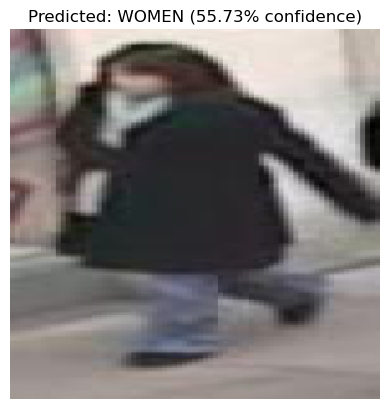

In [ ]:
image_path = '/Users/arunaa/SIH/CCTV_Gender/FEMALE/64_1362.jpg'
label, confidence = classify_image(image_path)

In [7]:
''' this part is include confidence and it is failed bcz its show male as female '''

import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# Define the image size expected by your model
img_width, img_height = 299, 299  # Example size, adjust according to your model

# Load the pre-trained model
model = load_model('C:/Users/matha/Downloads/face.keras')  # Replace with your model's path

# Load face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def classify_face(frame, face_coords):
    x, y, w, h = face_coords
    face = frame[y:y+h, x:x+w]

    # Resize face to match the model's input size
    resized_face = cv2.resize(face, (img_width, img_height))
    img_array = img_to_array(resized_face)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image

    # Make prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]
    if confidence > 0.5:
        label = "WOMEN"
        confidence = confidence * 100
    else:
        label = "MEN"
        confidence = (1 - confidence) * 100

    return label, confidence

def start_camera():
    # Open a connection to the camera
    cap = cv2.VideoCapture(1)

    if not cap.isOpened():
        print("Error: Could not open video device")
        return

    # Set the camera resolution
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

    while True:
        # Initialize counters
        men_count = 0
        women_count = 0

        # Capture frame-by-frame
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw a rectangle around each face and predict gender
        for (x, y, w, h) in faces:
            label, confidence = classify_face(frame, (x, y, w, h))

            # Update the counts based on the label
            if label == "MEN":
                men_count += 1
            else:
                women_count += 1

            # Draw rectangle around face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Display the label and confidence above the rectangle
            text = f"{label}: {confidence:.2f}%"
            cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

        # Display the count of men and women on the frame
        count_text = f"Men: {men_count}  Women: {women_count}"
        cv2.putText(frame, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)

        # Display the resulting frame
        cv2.imshow('Gender Classification', frame)
        cv2.waitKey(1)  # Add a small delay to process window events

        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Stopping camera feed...")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()

start_camera()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Stopping camera feed...


In [9]:
pip install mtcnn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
'''it classification is good but lag too high'''

import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from mtcnn import MTCNN
from collections import deque

# Define the image size expected by your model
img_width, img_height = 299, 299

# Load the pre-trained model
model = load_model('C:/Users/matha/Documents/SIH/GITHUB/Gender_Classify.keras')

# Initialize MTCNN face detector
detector = MTCNN()

# Initialize deque for smoothing predictions
recent_predictions = deque(maxlen=10)

# To reduce detection frequency
detection_interval = 5  # Detect every 5 frames
frame_counter = 0

def classify_face(frame, face_coords):
    x, y, w, h = face_coords
    face = frame[y:y+h, x:x+w]

    # Resize face to match the model's input size
    resized_face = cv2.resize(face, (img_width, img_height))
    img_array = img_to_array(resized_face)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make prediction
    prediction = model.predict(img_array)
    confidence = prediction[0][0]

    if confidence > 0.7:
        label = "WOMEN"
    elif confidence < 0.3:
        label = "MEN"
    else:
        label = "UNKNOWN"

    return label

def smooth_prediction(label):
    label_value = 1 if label == "WOMEN" else (0 if label == "MEN" else 0.5)
    recent_predictions.append(label_value)
    avg_label_value = np.mean(recent_predictions)

    if avg_label_value > 0.6:
        smoothed_label = "WOMEN"
    elif avg_label_value < 0.4:
        smoothed_label = "MEN"
    else:
        smoothed_label = "UNKNOWN"

    return smoothed_label

def start_camera():
    cap = cv2.VideoCapture(1)

    if not cap.isOpened():
        print("Error: Could not open video device")
        return

    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

    global frame_counter
    tracked_faces = []  # To hold the tracked face coordinates

    while True:
        men_count = 0
        women_count = 0
        ret, frame = cap.read()

        if not ret:
            print("Failed to grab frame")
            break

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces every few frames to reduce lag
        if frame_counter % detection_interval == 0:
            detections = detector.detect_faces(rgb_frame)
            tracked_faces = [d['box'] for d in detections if d['confidence'] > 0.9]
        
        frame_counter += 1

        # Draw rectangles and classify faces
        for (x, y, w, h) in tracked_faces:
            x, y = max(0, x), max(0, y)

            label = classify_face(frame, (x, y, w, h))
            smoothed_label = smooth_prediction(label)

            if smoothed_label == "MEN":
                men_count += 1
            elif smoothed_label == "WOMEN":
                women_count += 1

            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            if smoothed_label != "UNKNOWN":
                text = f"{smoothed_label}"
                cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

        count_text = f"Men: {men_count}  Women: {women_count}"
        cv2.putText(frame, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)

        cv2.imshow('Gender Classification', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Stopping camera feed...")
            break

    cap.release()
    cv2.destroyAllWindows()

start_camera()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━